In [6]:
import numpy
from Session import *
from ChoicePredictor import *

In [10]:
mouse = "mSM34"
day = "02-Dec-2017"
session = Session("vistrained", mouse, day)
lrchoice = LRChoice(session, "full")
results = lrchoice.fit_all()

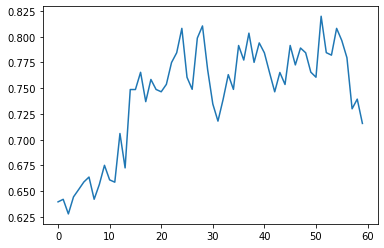

In [13]:
import matplotlib.pyplot as plt
plt.plot(results['scores'])
plt.show()

In [51]:
num_states = 3
symb = []
emit_w = []
trans_w = []
stim = []

data = lrchoice.data
choices = lrchoice.trial_choices
num_bins = data.shape[1]
num_regressors = data.shape[2]*2

for trial in range(session.num_trials):
    symb_t = []
    stim_t = []
    if np.isnan(choices[trial]):
        print("Nan choice")
        continue
    for index in range(num_bins - 1):
        symb_t.append(choices[trial])
        regressors = data[trial, index:index+2, :].flatten()
        if regressors.size != 484:
            import pdb; pdb.set_trace()
        stim_t.append(regressors)
    symb_t = np.array(symb_t)
    stim_t = np.array(stim_t)
    symb.append(symb_t)
    stim.append(stim_t)
symb = np.array(symb)
stim = np.array(stim)
trans_w = np.ones((num_states, num_states, num_regressors))/(1.0*num_states*num_regressors)
emit_w = np.zeros((num_states, 2, num_regressors))
bin_indices = np.linspace(0, num_bins, num_states+1)
for state_idx in range(bin_indices.size - 1):
    start_bin = int(bin_indices[state_idx]//2)
    end_bin = int(bin_indices[state_idx+1]//2)
    emit_weights = []
    for lr in results['models'][start_bin:end_bin]:
        emit_weights.append(lr.coef_.squeeze())
    emit_weights = np.array(emit_weights)
    avg_emit_weights = np.mean(emit_weights, axis=0)
    emit_w[state_idx,0,:] = -1*avg_emit_weights
    emit_w[state_idx,1,:] = avg_emit_weights

Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice
Nan choice


In [52]:
from scipy.io import savemat
savemat(
    "../matlab_code/calhoun_" + mouse + "_" + day + "_" + str(num_states) + ".mat",
    {'num_states': num_states,
     'symb': symb,
     'emit_w': emit_w,
     'trans_w': trans_w,
     'stim': stim
    }
    )